<font size=5 face="黑体">大作业任务：对Kaggle平台上的威斯康辛州乳腺癌数据集进行分类，并可视化。</font>
  
  本项目采用支持向量机和逻辑回归的分类方法对数据进行分类

<font size=4 face="黑体"> 一，数据集分析.</font>

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
dataset = pd.read_csv("data.csv")
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


首先导入必要的Python库（包括用于数据可视化的matplotlib和seaborn、用于数据处理的pandas和numpy，以及用于数据标准化的sklearn.preprocessing模块中的StandardScaler），然后通过pandas读取名为"data.csv"的数据文件并存储在dataset变量中，最后使用head()方法显示数据集的前几行内容。

In [61]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

 利用pandas 中用于快速查看的dataset.info() ，可列出所有列名及对应的非空值数量和显示每列的数据类型

In [62]:
#进行数据清洗
#M(恶性)= 0，B(良性)= 1
dataset['diagnosis'] = dataset['diagnosis'].replace(['M','B'],['0','1'])
#删除无用列id和全空列Unnamed: 32  
dataset=dataset.drop(['Unnamed: 32', 'id'], axis = 1)
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


对乳腺癌数据集进行了数据清洗和预处理：首先将诊断结果列中的'M'（恶性）替换为数值0、'B'（良性）替换为数值1，实现目标变量的数值化编码；其次删除了无用的ID列（'id'）和全空列（'Unnamed: 32'），减少冗余数据；最后通过head()展示清洗后的前五行数据，用于快速验证处理结果。

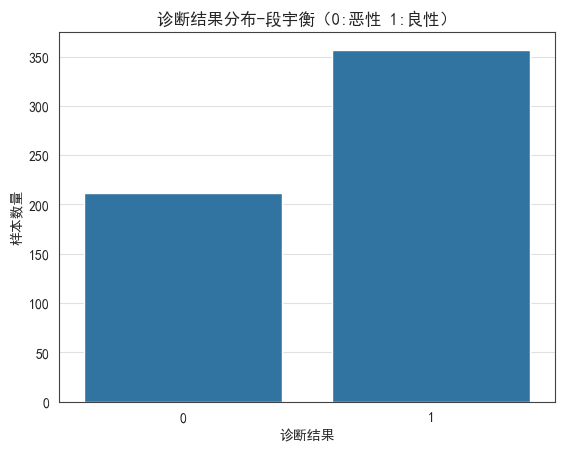

In [63]:
plt.rcParams['font.family'] = 'SimHei' 
 
# 诊断结果的计数图
sns.countplot(x=dataset['diagnosis'])
plt.title('诊断结果分布-段宇衡（0:恶性 1:良性）')
plt.xlabel('诊断结果')
plt.ylabel('样本数量')
plt.show()

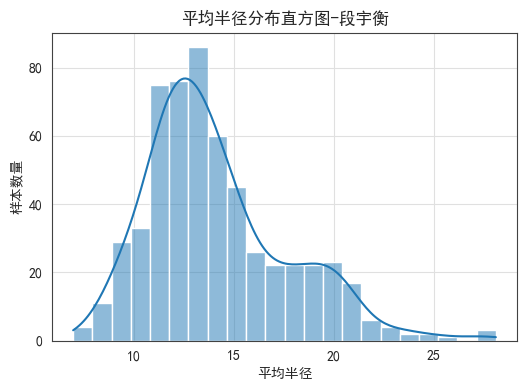

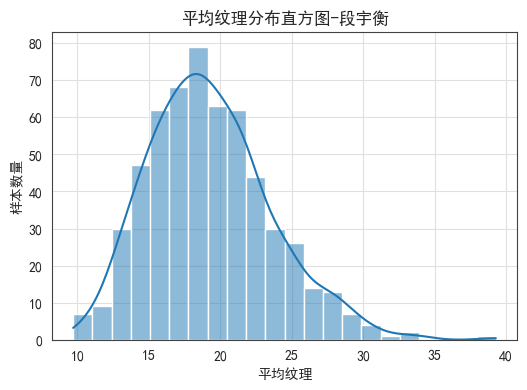

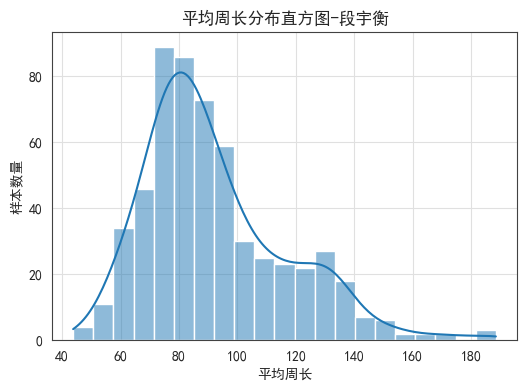

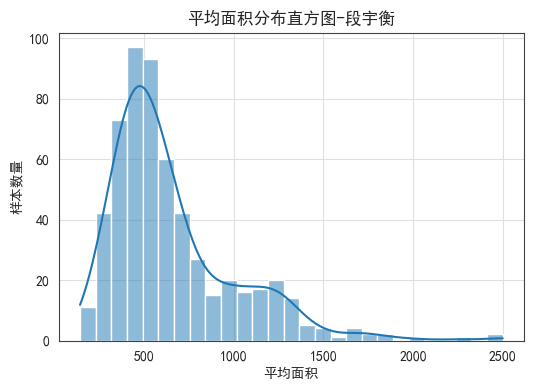

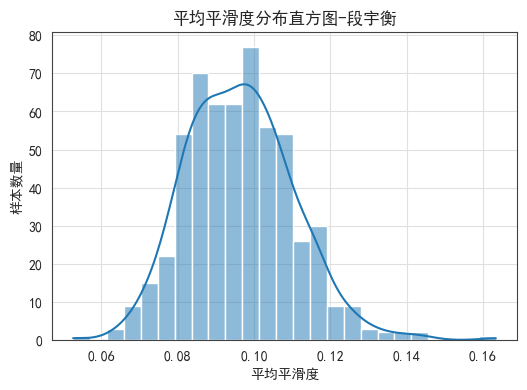

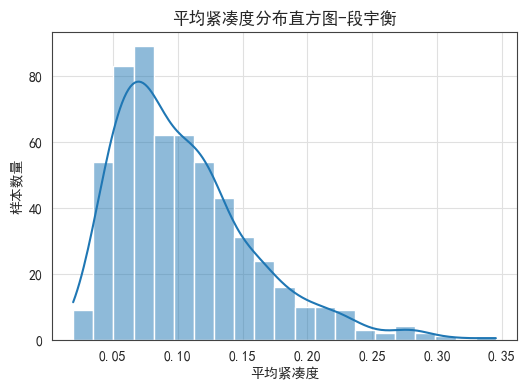

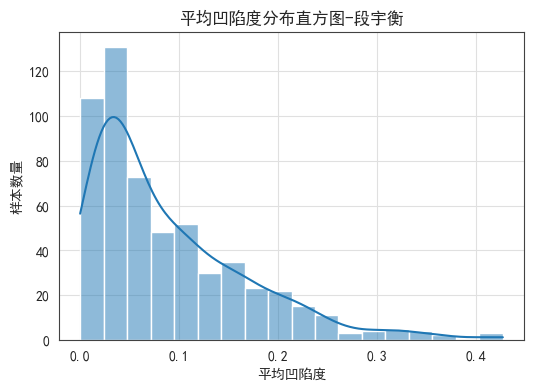

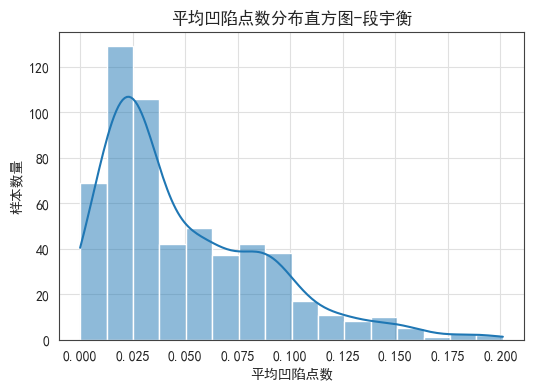

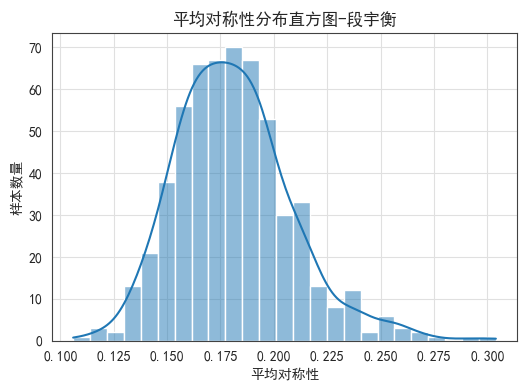

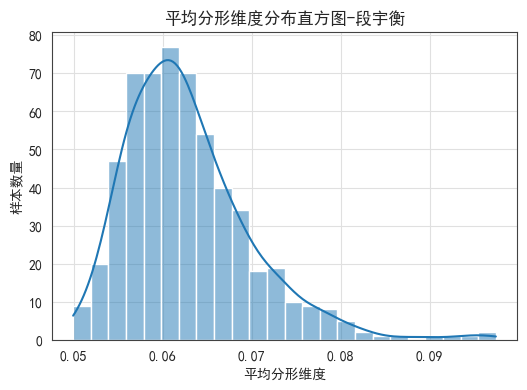

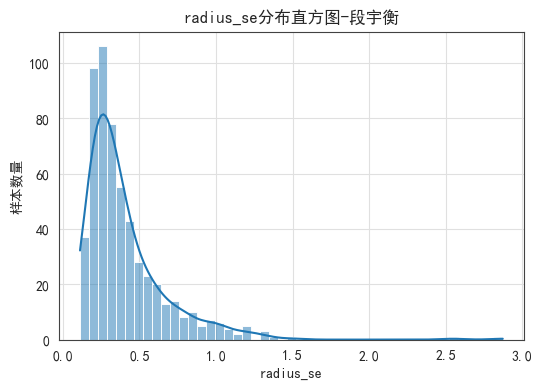

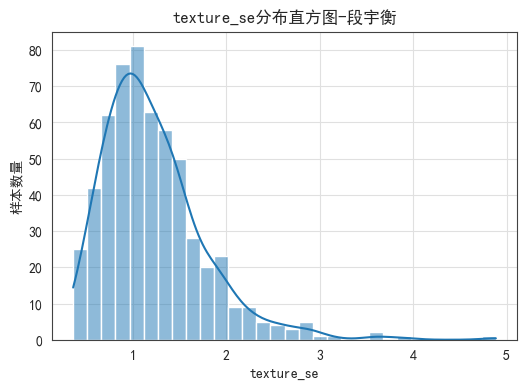

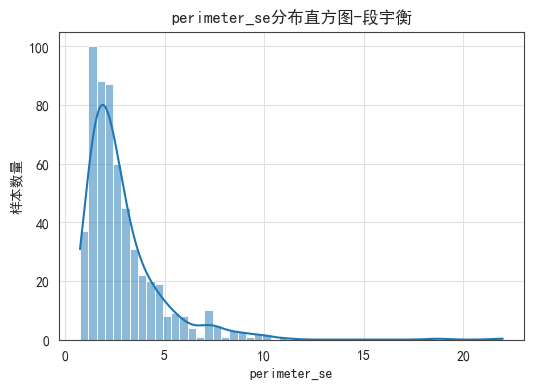

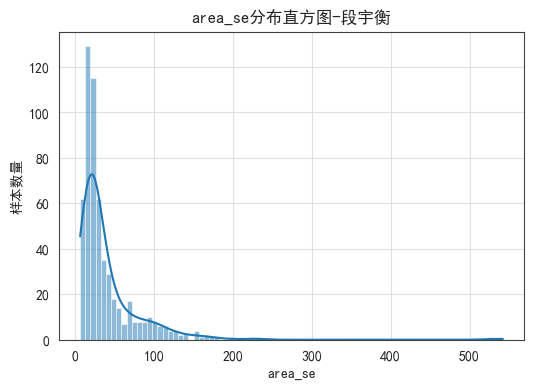

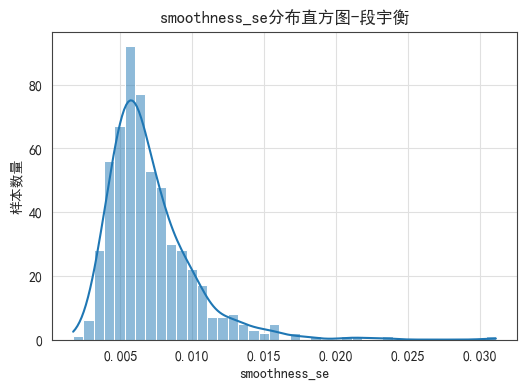

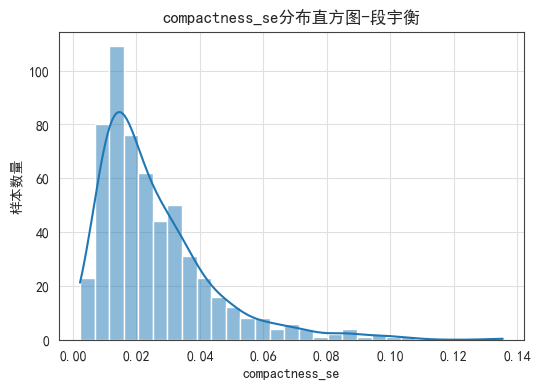

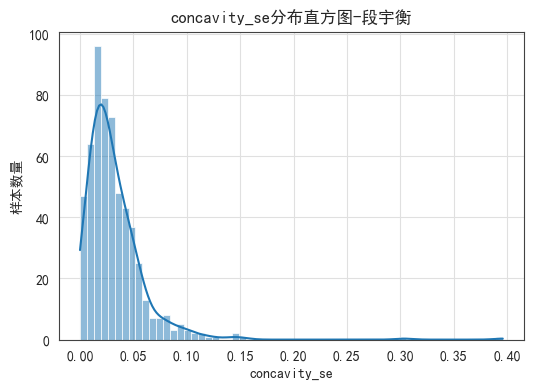

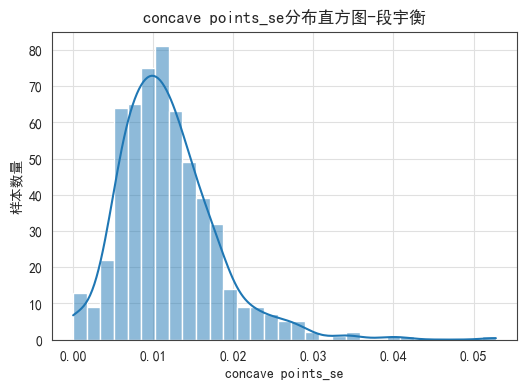

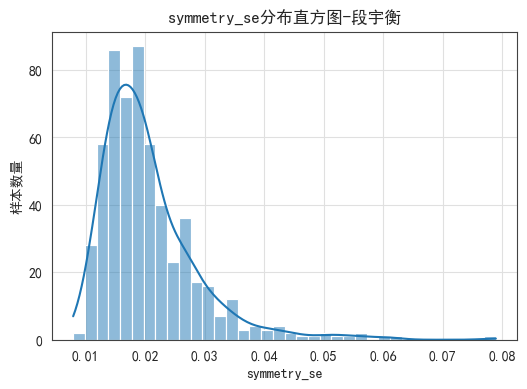

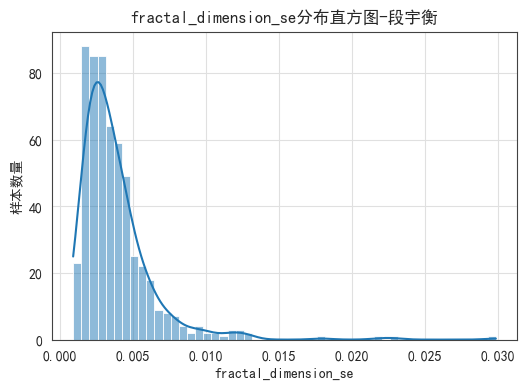

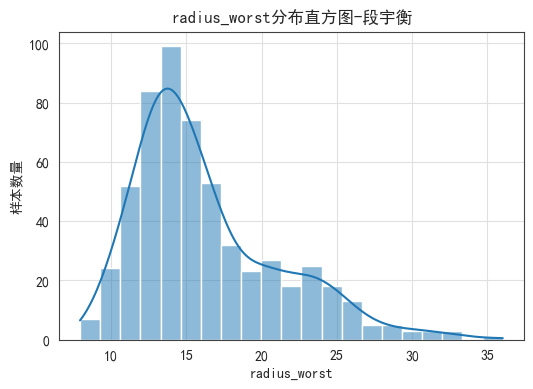

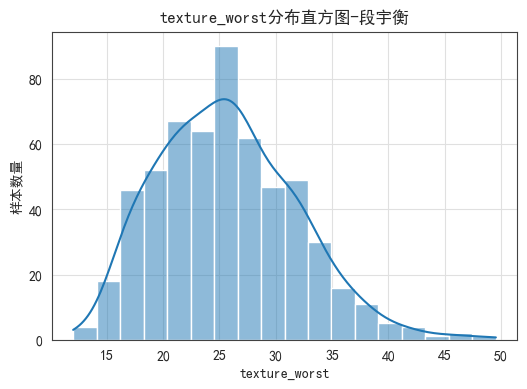

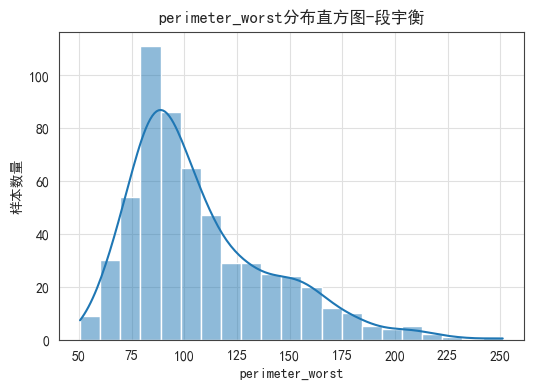

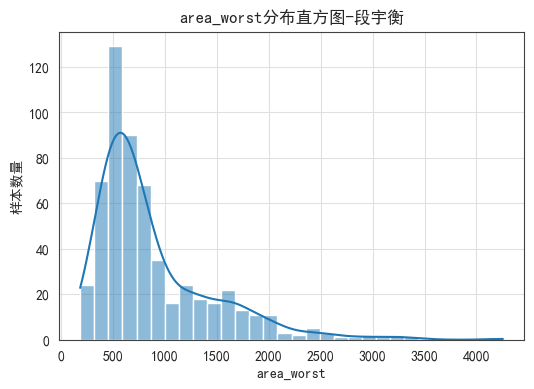

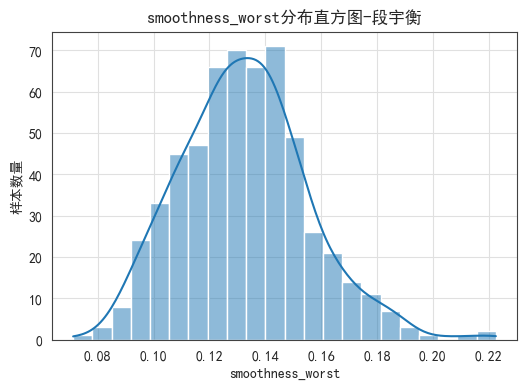

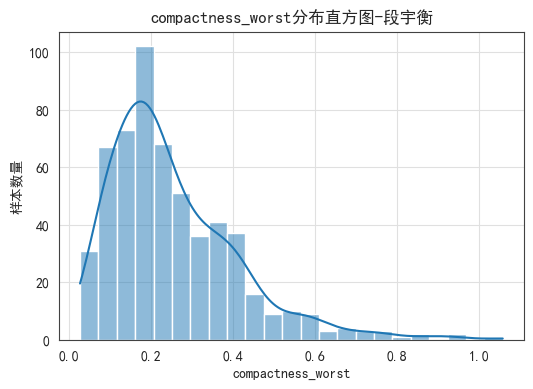

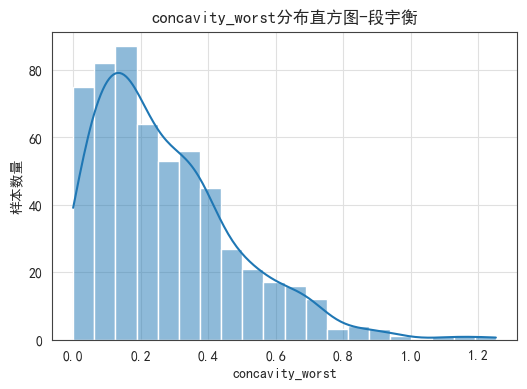

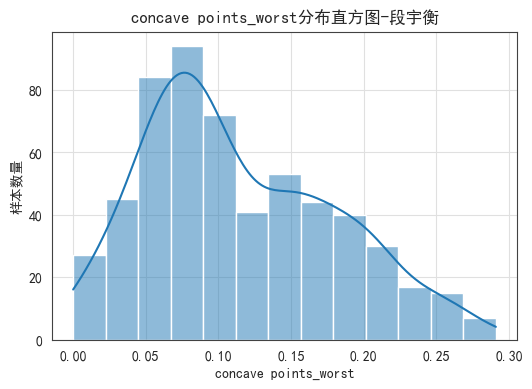

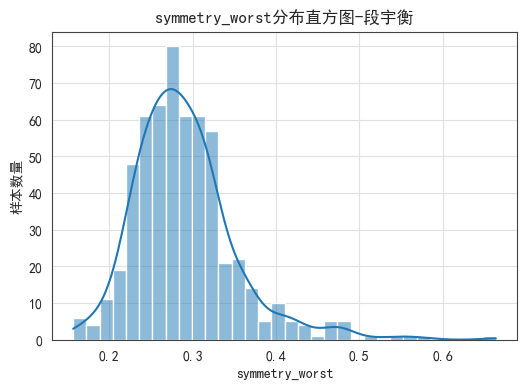

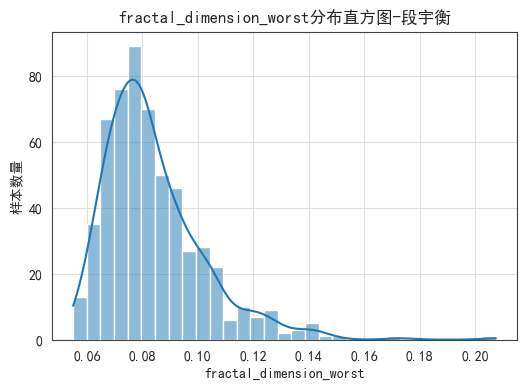

In [64]:
dataset2 = dataset.drop('diagnosis', axis=1)
 
# 定义特征中文名称映射（根据你的实际特征修改）
feature_names_cn = {
    'radius_mean': '平均半径',
    'texture_mean': '平均纹理',
    'perimeter_mean': '平均周长',
    'area_mean': '平均面积',
    'smoothness_mean': '平均平滑度',
    'compactness_mean': '平均紧凑度',
    'concavity_mean': '平均凹陷度',
    'concave points_mean': '平均凹陷点数',
    'symmetry_mean': '平均对称性',
    'fractal_dimension_mean': '平均分形维度',
}
 
for i, feature_name in enumerate(dataset2.columns.values):
    plt.figure(figsize=(6, 4))
    sns.histplot(dataset2.iloc[:, i], kde=True)
    cn_title = feature_names_cn.get(feature_name, feature_name)
    plt.title(f'{cn_title}分布直方图-段宇衡') 
    plt.xlabel(cn_title)
    plt.ylabel('样本数量')
    plt.show()

这段代码主要用于对乳腺癌数据集进行特征分布的可视化分析，首先移除目标变量列后，通过循环遍历每个特征列，使用Seaborn的histplot函数绘制带核密度估计曲线的直方图，并结合预定义的中文特征名称映射字典为每个图表添加中文标题和坐标轴标签

In [65]:
# 数据标准化
scaler = StandardScaler()
dataset_scaled = dataset.copy()
dataset_scaled[dataset_scaled.columns[:-1]] = scaler.fit_transform(dataset_scaled[dataset_scaled.columns[:-1]])
 

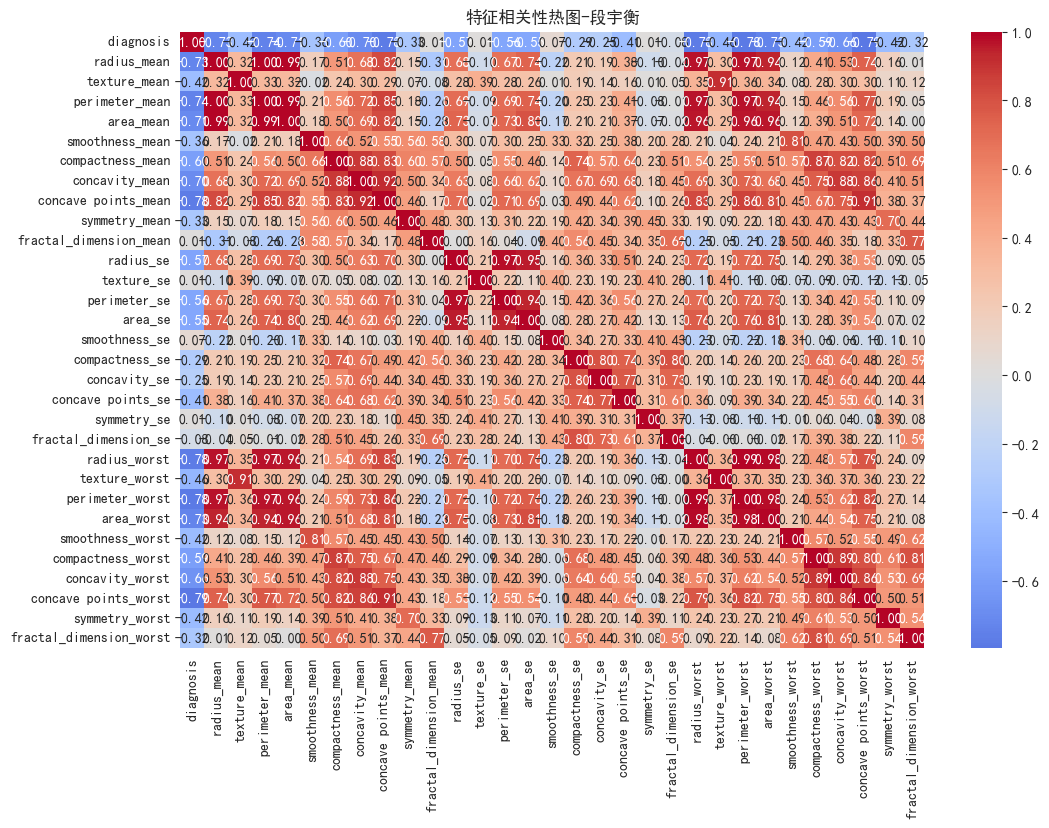

In [66]:
# 热图
plt.figure(figsize=(12, 8))
corr = dataset_scaled.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('特征相关性热图-段宇衡')
plt.show()

首先对数据集（排除目标变量列）进行标准化处理，通过StandardScaler()将所有特征转换为均值为0、标准差为1的标准正态分布，以确保不同量纲的特征具有可比性；随后，计算标准化后数据的相关系数矩阵，并使用Seaborn的heatmap()函数绘制相关性热力图，通过蓝-红渐变色系直观展示特征间的正负相关性及强度，标注具体相关系数值，并设置色标以0为中心对称，最终生成一个颜色分明的对称矩阵图

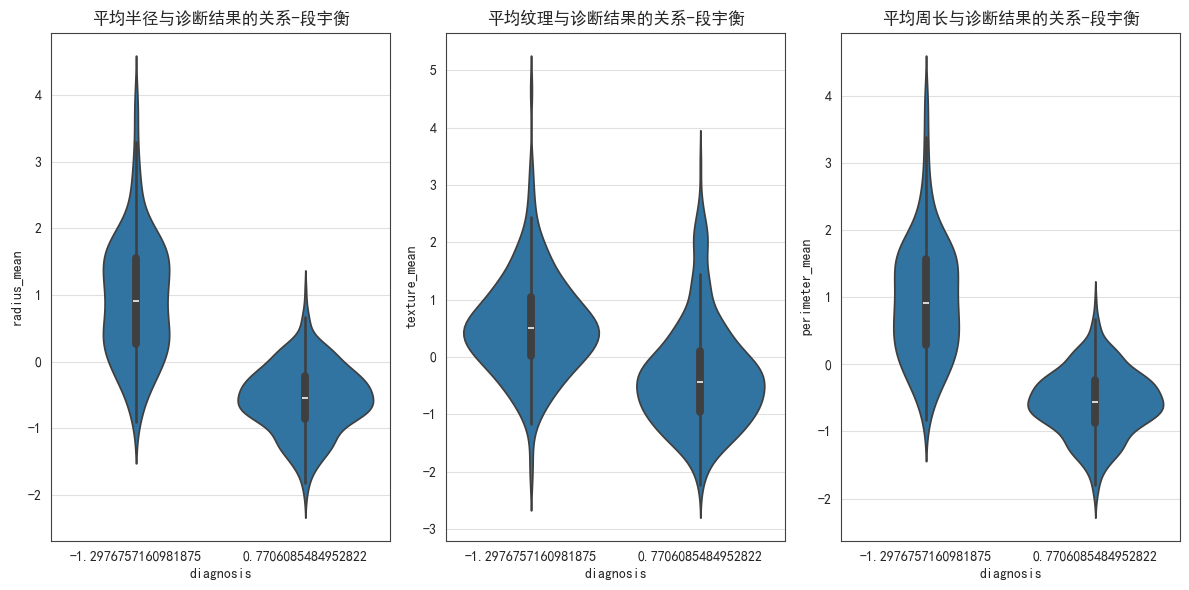

In [67]:
# 类别特征与数值特征的关系
plt.figure(figsize=(12, 6))
for i, feature_name in enumerate(dataset_scaled.drop('diagnosis', axis=1).columns[:3]):  # 仅展示前三个特征
    plt.subplot(1, 3, i+1)
    sns.violinplot(x='diagnosis', y=feature_name, data=dataset_scaled)
    plt.title(f'{feature_names_cn.get(feature_name, feature_name)}与诊断结果的关系-段宇衡')
plt.tight_layout()
plt.show()

<font size=5 face="黑体"> 二，支持向量机数据分类.</font>

  支持向量机（Support Vector Machine, SVM）是一种基于间隔最大化原则的监督学习算法，其核心目标是在特征空间中找到一个最优超平面，将不同类别的数据点尽可能分开，同时最大化分类边界（间隔）以提升泛化能力。

  其优势在于对小样本数据表现优异，尤其在特征维度高于样本数量时。且通过核函数可处理非线性问题，无需显式特征变换。模型鲁棒性强，对噪声和异常值不敏感
  

支持向量机预测准确率: 0.9211


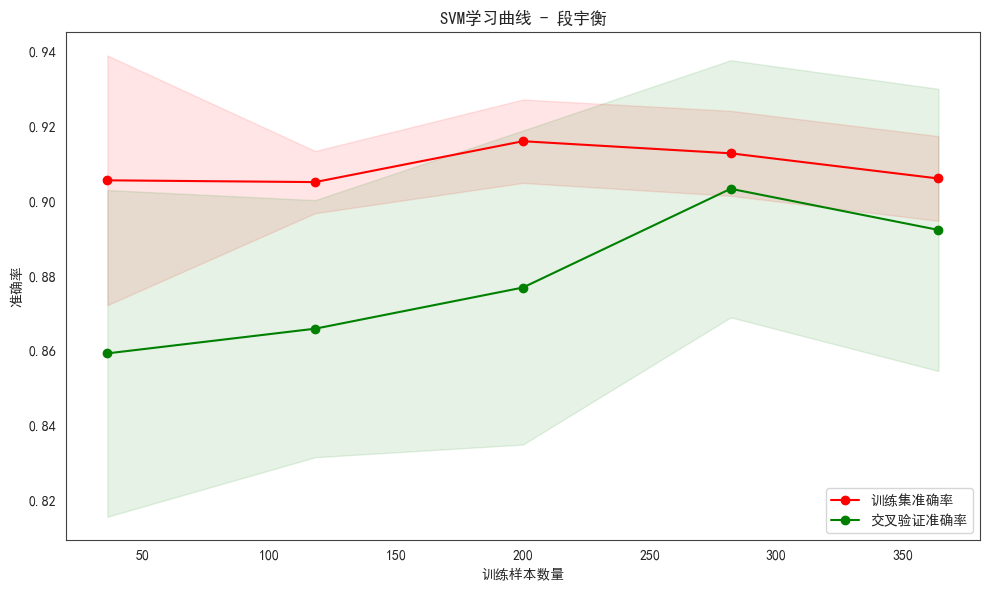

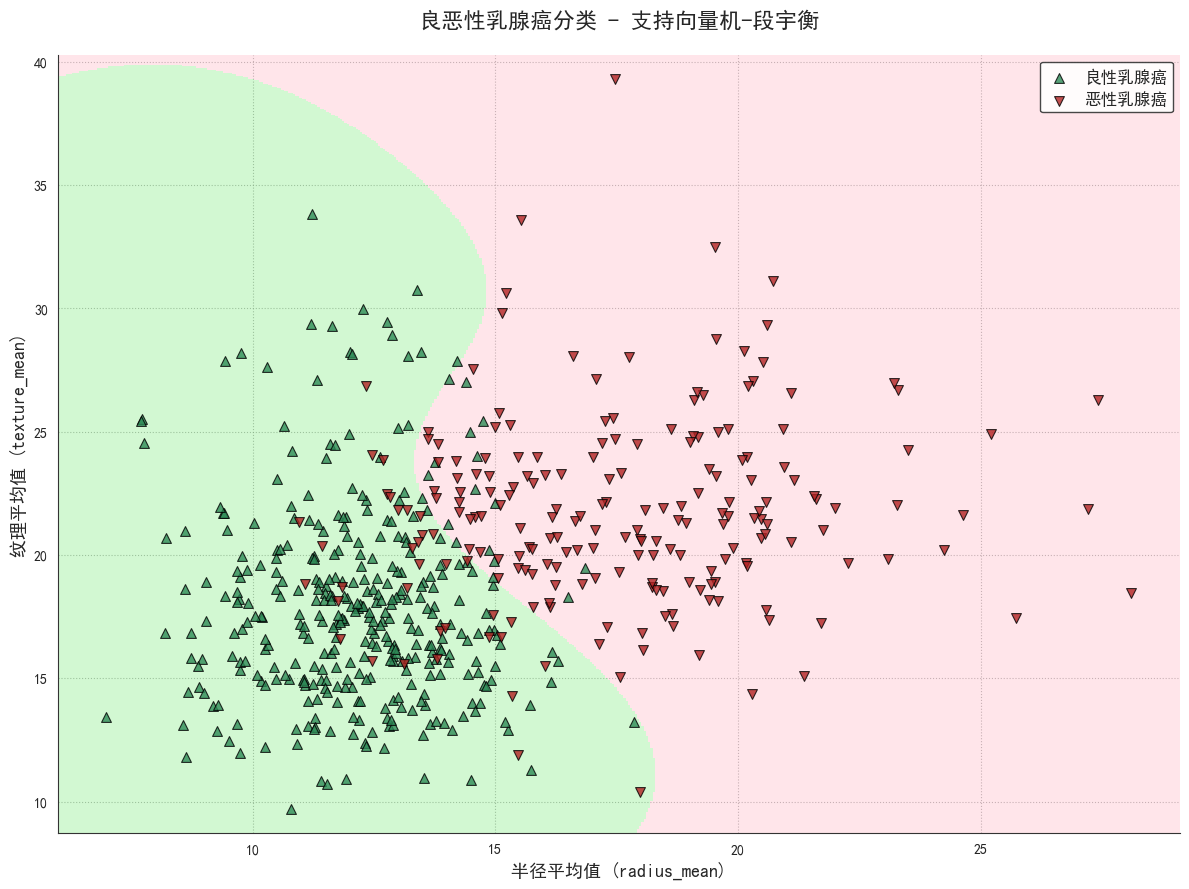

In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import matplotlib as mpl

# 设置全局字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取数据集
data = pd.read_csv('data.csv')

# 数据预处理
data['diagnosis'] = data['diagnosis'].map({'M': 0, 'B': 1})
x = data[['radius_mean', 'texture_mean']].values
y = data['diagnosis'].values

# 拆分训练集与测试集
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 创建并训练SVM模型
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)

# 模型评估
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("支持向量机预测准确率: {:.4f}".format(accuracy))

# 绘制学习曲线
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("训练样本数量")
    plt.ylabel("准确率")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="训练集准确率")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="交叉验证准确率")
    
    plt.legend(loc="best")
    return plt

# 绘制学习曲线
plot_learning_curve(svm, "SVM学习曲线 - 段宇衡", X_train, y_train, cv=5)
plt.tight_layout()
plt.savefig('svm_learning_curve.png', dpi=300, bbox_inches='tight')
plt.show()

# 准备绘制决策边界
l, r = x[:, 0].min() - 1, x[:, 0].max() + 1
b, t = x[:, 1].min() - 1, x[:, 1].max() + 1
n = 500

# 生成网格点
grid_x, grid_y = np.meshgrid(np.linspace(l, r, n), np.linspace(b, t, n))
mesh_x = np.column_stack((grid_x.ravel(), grid_y.ravel()))

# 预测网格点类别
pred_mesh_y = svm.predict(mesh_x)
grid_z = pred_mesh_y.reshape(grid_x.shape)

plt.figure(figsize=(12, 9))
cm_light = mpl.colors.ListedColormap(['#FFC0CB', '#90EE90'])
plt.pcolormesh(grid_x, grid_y, grid_z, cmap=cm_light, alpha=0.4, shading='auto')

plt.scatter(x[y == 1, 0], x[y == 1, 1], s=50, c='#2E8B57', marker='^', 
           label='良性乳腺癌', edgecolors='k', alpha=0.8, linewidths=0.8)
plt.scatter(x[y == 0, 0], x[y == 0, 1], s=50, c='#B22222', marker='v', 
           label='恶性乳腺癌', edgecolors='k', alpha=0.8, linewidths=0.8)

plt.title('良恶性乳腺癌分类 - 支持向量机-段宇衡', fontsize=16, pad=20)
plt.xlabel('半径平均值 (radius_mean)', fontsize=13)
plt.ylabel('纹理平均值 (texture_mean)', fontsize=13)
plt.xlim(l, r)
plt.ylim(b, t)

legend = plt.legend(loc='upper right', framealpha=0.9, edgecolor='#333333')
for text in legend.get_texts():
    text.set_fontsize(12)

plt.grid(True, linestyle=':', alpha=0.7, color='gray')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#333333')
plt.gca().spines['bottom'].set_color('#333333')

plt.tight_layout()
plt.savefig('svm_result_modified.png', dpi=300, bbox_inches='tight', 
           facecolor='w', edgecolor='w', metadata={'Creator': None, 'Producer': None})
plt.show()

使用支持向量机（SVM）对乳腺癌数据集进行分类，先将数据集中的诊断结果（恶性/良性）映射为数值标签，然后使用半径和纹理特征训练SVM模型，评估模型在测试集上的准确率。然后绘制了学习曲线以分析模型在不同训练样本数量下的性能，最后可视化决策边界，展示模型在特征空间中的分类效果。

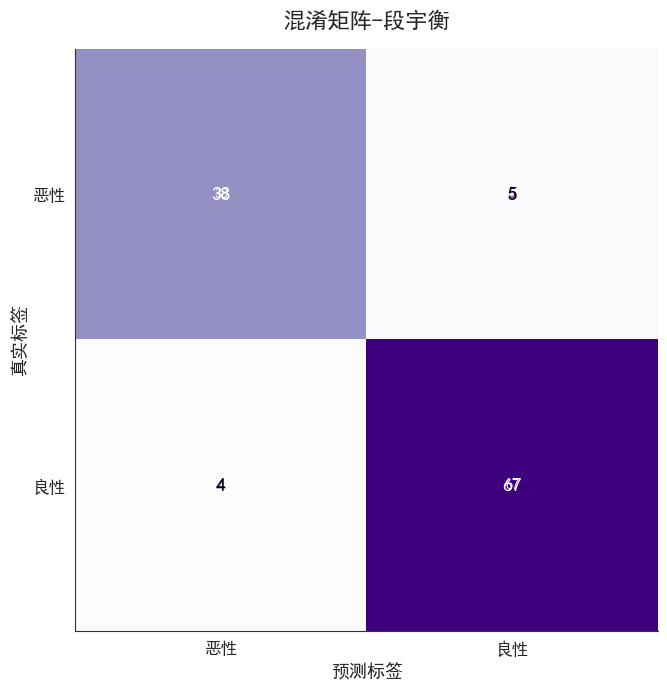


3. 分类报告：
              precision    recall  f1-score   support

          恶性       0.90      0.88      0.89        43
          良性       0.93      0.94      0.94        71

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



In [69]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['恶性', '良性'])
fig, ax = plt.subplots(figsize=(8, 7))
disp.plot(ax=ax, cmap='Purples', colorbar=False)  # 使用紫色系

# 添加数值标签
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', 
                color='white' if cm[i, j] > cm.max()/2 else 'black',
                fontsize=14)

# 设置混淆矩阵的字体和样式
ax.set_title('混淆矩阵-段宇衡', fontproperties='SimHei', fontsize=16, pad=15)
ax.set_xlabel('预测标签', fontproperties='SimHei', fontsize=13)
ax.set_ylabel('真实标签', fontproperties='SimHei', fontsize=13)

# 设置刻度标签字体
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties('SimHei')
    label.set_fontsize(12)

# 调整边框和网格
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#333333')
ax.spines['bottom'].set_color('#333333')
ax.grid(False)

plt.tight_layout()
plt.show()

# 打印分类报告
print("\n3. 分类报告：")
print("=" * 30)
print(classification_report(y_test, y_pred, target_names=["恶性", "良性"]))
print("=" * 30)

该代码计算并可视化SVM模型的混淆矩阵

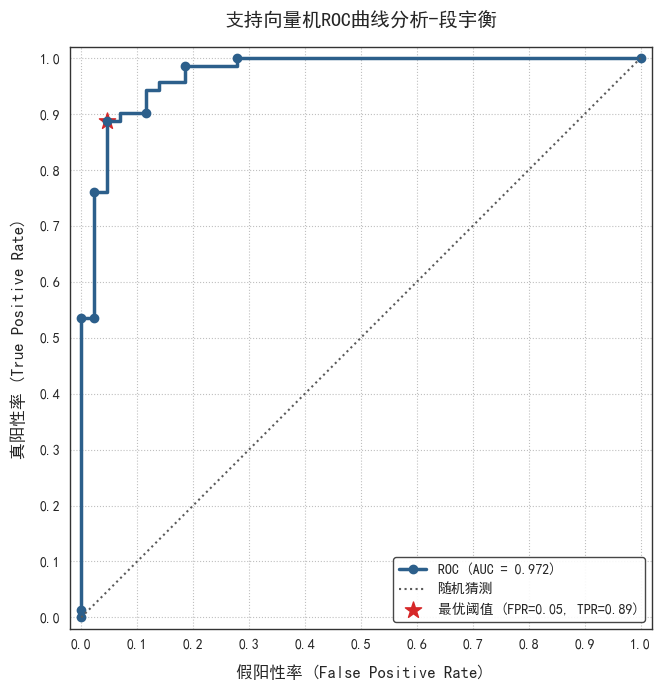


                ROC分析结果                 
AUC值: 0.9718
最佳阈值: 0.7972
对应敏感度: 0.8873
对应特异性: 0.9535


In [70]:
# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 示例数据加载
data = pd.read_csv('data.csv')
data['diagnosis'] = data['diagnosis'].map({'M': 0, 'B': 1})
X = data[['radius_mean', 'texture_mean']].values
y = data['diagnosis'].values

# 数据拆分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练SVM模型
model = SVC(kernel='rbf', probability=True)
model.fit(X_train, y_train)

# 计算ROC曲线
y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 7), dpi=100)

# 主ROC曲线
plt.plot(fpr, tpr, color='#2C5F8B', lw=2.5, 
         marker='o', markersize=6, markevery=0.1,
         label=f'ROC (AUC = {roc_auc:.3f})')

# 对角线参考线
plt.plot([0, 1], [0, 1], color='#5A5A5A', lw=1.5, linestyle=':', 
         label='随机猜测')

# 标注最佳阈值点
optimal_idx = np.argmax(tpr - fpr)
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], 
            color='#D62728', marker='*', s=150,
            label=f'最优阈值 (FPR={fpr[optimal_idx]:.2f}, TPR={tpr[optimal_idx]:.2f})')

# 坐标轴标签
plt.xlabel('假阳性率 (False Positive Rate)', fontsize=12, labelpad=10)
plt.ylabel('真阳性率 (True Positive Rate)', fontsize=12, labelpad=10)
plt.title('支持向量机ROC曲线分析-段宇衡', fontsize=14, pad=15)

# 坐标轴范围
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])

# 刻度设置
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))

# 网格线
plt.grid(True, linestyle=':', alpha=0.5, color='gray')

# 图例
plt.legend(loc='lower right', frameon=True, framealpha=0.9, 
           edgecolor='#333333', fontsize=10)

# 保持1:1比例
plt.gca().set_aspect('equal', adjustable='box')

# 边框处理
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_color('#333333')
    spine.set_linewidth(1)

plt.tight_layout()

# 保存图片（可选）
plt.savefig('ROC_Academic_Style.png', bbox_inches='tight', dpi=300)

plt.show()

# 打印关键指标
print(f"\n{'='*40}")
print(f"{'ROC分析结果':^40}")
print(f"{'='*40}")
print(f"AUC值: {roc_auc:.4f}")
print(f"最佳阈值: {thresholds[optimal_idx]:.4f}")
print(f"对应敏感度: {tpr[optimal_idx]:.4f}")
print(f"对应特异性: {1-fpr[optimal_idx]:.4f}")
print(f"{'='*40}")



这部分加载数据并进行预处理，将诊断结果映射为数值标签，然后拆分数据集并训练SVM模型。然后计算了ROC曲线的关键指标（假阳性率、真阳性率、AUC值），并绘制了ROC曲线，包括主曲线、随机猜测参考线以及标注了最佳阈值点。

结果分析：

 AUC值：0.9718--0.9718的AUC值非常接近1，这表明该模型在区分正例和负例方面具有很高的准确性和判别能力。

最佳阈值：0.8002--当模型的预测概率大于或等于0.8002时，样本被预测为正例；当预测概率小于0.8002时，样本被预测为负例。

对应敏感度：0.8873--0.8873的敏感度意味着模型能够正确识别出88.73%的实际正例样本。这说明模型在检测正例方面具有较高的查全率，能够较好地捕捉到正例样本。

对应特异性：0.9535--0.9535的特异性意味着模型能够正确识别出95.35%的实际负例样本。这表明模型在排除负例方面具有很高的准确性，能够有效地避免将负例误判为正例。

<font size=5 face="黑体"> 三，逻辑回归数据分类.</font>
  
  逻辑回归是一种用于 二分类问题 的统计学习方法，用来预测一个事件发生的概率。
它将输入特征通过一个线性函数组合，再使用Sigmoid函数将结果映射到 [0, 1]的概率范围，最终根据设定的阈值将样本分类。
  

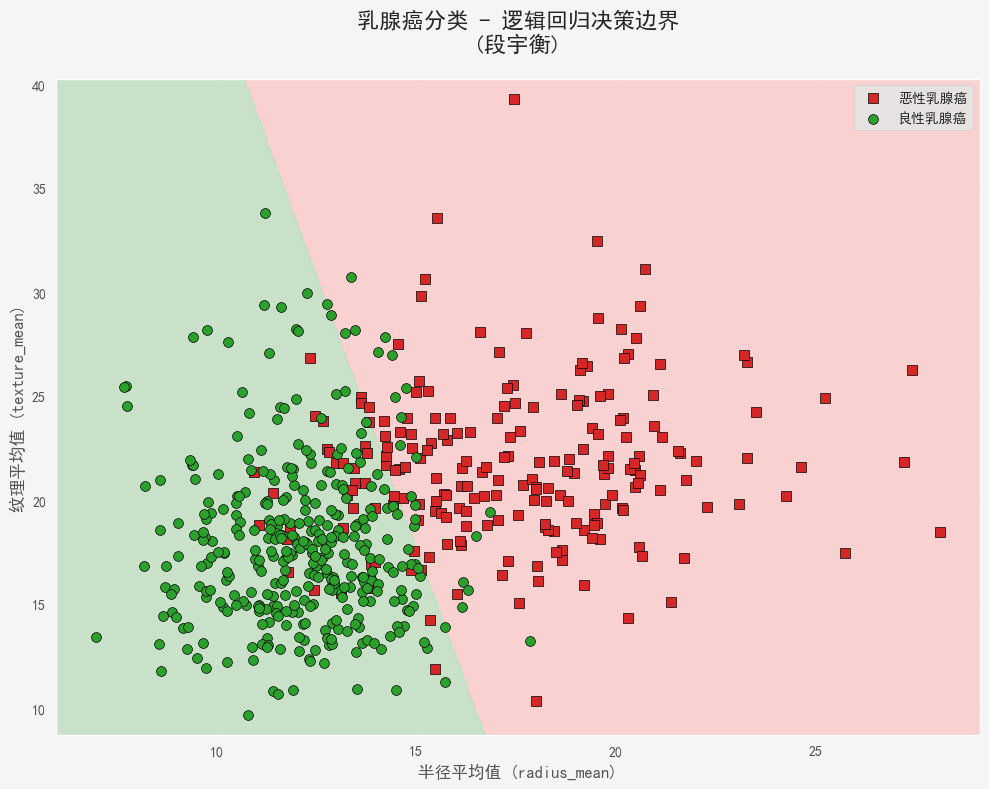

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, roc_curve, auc, 
                           classification_report, confusion_matrix, 
                           ConfusionMatrixDisplay, precision_recall_curve,
                           average_precision_score)
from sklearn.preprocessing import StandardScaler


# 设置中文显示和全局样式
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
mpl.style.use('ggplot')   # 使用seaborn风格


# 读取和预处理数据
data = pd.read_csv('data.csv')
data['diagnosis'] = data['diagnosis'].map({'M': 0, 'B': 1})  # 恶性=0，良性=1

# 特征选择
features = ['radius_mean', 'texture_mean']
x = data[features].values
y = data['diagnosis'].values

# 数据集拆分
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y)


# 创建并训练逻辑回归模型
lr = LogisticRegression(random_state=42, max_iter=1000, C=1.0)
lr.fit(X_train, y_train)


# 预测结果
y_pred = lr.predict(X_test)
y_proba = lr.predict_proba(X_test)[:, 1]

# 评估指标
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)


# 1. 决策边界可视化 (SVM风格)
plt.figure(figsize=(10, 8), facecolor='#f5f5f5')

# 生成网格数据
xx, yy = np.meshgrid(np.linspace(x[:,0].min()-1, x[:,0].max()+1, 500),
                     np.linspace(x[:,1].min()-1, x[:,1].max()+1, 500))
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# 绘制决策边界
cm_light = mpl.colors.ListedColormap(['#FFCCCB', '#C1E1C1'])  # 浅红-恶性，浅绿-良性
plt.contourf(xx, yy, Z, cmap=cm_light, alpha=0.8)

# 绘制数据点
plt.scatter(x[y==0, 0], x[y==0, 1], c='#D62728', marker='s', 
            edgecolor='k', s=50, label='恶性乳腺癌')
plt.scatter(x[y==1, 0], x[y==1, 1], c='#2CA02C', marker='o', 
            edgecolor='k', s=50, label='良性乳腺癌')

# 图表装饰
plt.title('乳腺癌分类 - 逻辑回归决策边界\n(段宇衡)', fontsize=16, pad=20)
plt.xlabel('半径平均值 (radius_mean)', fontsize=12)
plt.ylabel('纹理平均值 (texture_mean)', fontsize=12)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.legend(loc='upper right', framealpha=0.9)
plt.grid(True, linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()




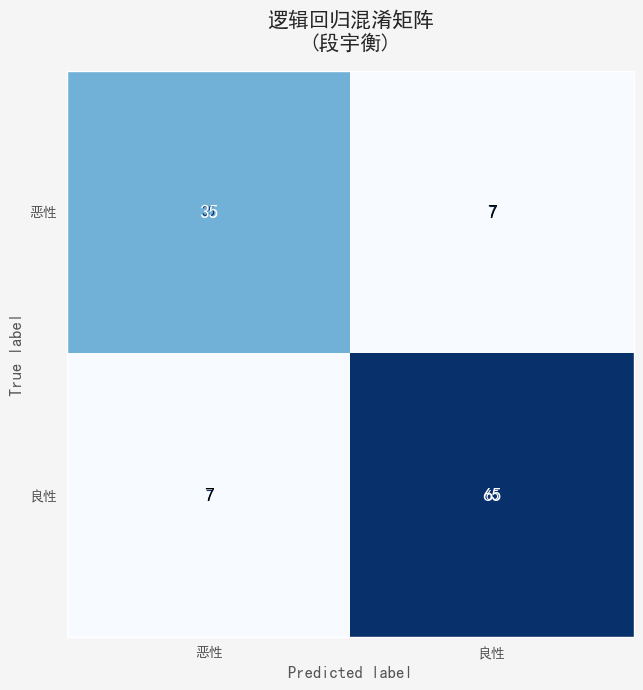

In [85]:
# 2. 混淆矩阵 (SVM风格)
plt.figure(figsize=(7, 7), facecolor='#f5f5f5')
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['恶性', '良性'])
disp.plot(cmap='Blues', values_format='d', ax=plt.gca(), colorbar=False)

# 美化混淆矩阵
plt.title("逻辑回归混淆矩阵\n(段宇衡)", fontsize=15, pad=15)
plt.grid(False)
for i in range(2):
    for j in range(2):
        color = 'white' if cm[i,j] > cm.max()/2 else 'black'
        plt.text(j, i, cm[i,j], ha='center', va='center', 
                color=color, fontsize=14)
plt.tight_layout()
plt.show()


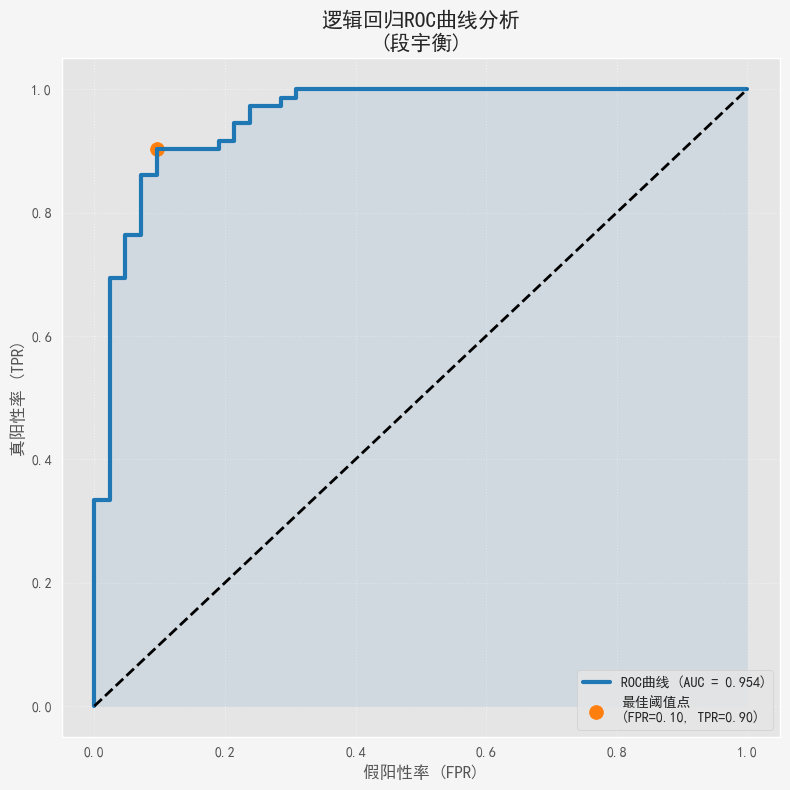

In [86]:
# 3. ROC曲线 (SVM风格)
plt.figure(figsize=(8, 8), facecolor='#f5f5f5')
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, color='#1f77b4', lw=3, 
         label=f'ROC曲线 (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.fill_between(fpr, tpr, color='#1f77b4', alpha=0.1)

# 标注最佳阈值点
optimal_idx = np.argmax(tpr - fpr)
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], 
            c='#ff7f0e', s=100, marker='o',
            label=f'最佳阈值点\n(FPR={fpr[optimal_idx]:.2f}, TPR={tpr[optimal_idx]:.2f})')

plt.xlabel('假阳性率 (FPR)', fontsize=12)
plt.ylabel('真阳性率 (TPR)', fontsize=12)
plt.title('逻辑回归ROC曲线分析\n(段宇衡)', fontsize=15)
plt.legend(loc='lower right', framealpha=0.9)
plt.grid(True, linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()


In [82]:

print("\n" + "="*50)
print(f"{'逻辑回归模型评估报告':^50}")
print("="*50)

print("\n1. 数据集信息:")
print("-"*50)
print(f"总样本数: {len(data)}")
print(f"特征数量: {len(features)}")
print(f"训练集样本: {X_train.shape[0]} ({X_train.shape[0]/len(data):.1%})")
print(f"测试集样本: {X_test.shape[0]} ({X_test.shape[0]/len(data):.1%})")

print("\n2. 模型性能:")
print("-"*50)
print(f"{'准确率:':<15}{accuracy:.4f}")
print(f"{'AUC值:':<15}{roc_auc:.4f}")

print("\n3. 分类报告:")
print("-"*50)
print(classification_report(y_test, y_pred, 
                          target_names=["恶性", "良性"]))
print("="*50)


                    逻辑回归模型评估报告                    

1. 数据集信息:
--------------------------------------------------
总样本数: 569
特征数量: 2
训练集样本: 455 (80.0%)
测试集样本: 114 (20.0%)

2. 模型性能:
--------------------------------------------------
准确率:           0.8772
AUC值:          0.9537

3. 分类报告:
--------------------------------------------------
              precision    recall  f1-score   support

          恶性       0.83      0.83      0.83        42
          良性       0.90      0.90      0.90        72

    accuracy                           0.88       114
   macro avg       0.87      0.87      0.87       114
weighted avg       0.88      0.88      0.88       114



precision（精确率）：0.90--表明在模型预测为良性的样本中，有90%确实是良性。说明模型在预测良性样本时较为准确。

recall（召回率）：0.90--意味着在实际为良性的样本中，有90%被模型正确预测为良性。即模型能够较好地识别良性样本，漏检率较低。

f1-score：0.90--综合了精确率和召回率，显示模型在良性类别上的性能较好。

support：72--表示测试集中实际有72个良性样本。

accuracy：0.88--与前面提到的整体准确率一致，进一步验证了模型在整体上的预测能力。

macro avg（宏平均）--precision、recall和f1-score均为0.87，是对两个类别指标的算术平均值，不考虑类别样本数量的差异，反映了模型在各个类别上的平均性能。

weighted avg（加权平均）--precision、recall和f1-score均为0.88，根据每个类别的样本数量对指标进行加权平均，更反映模型在整体数据集上的性能。